# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

<font color='red'>77/100</font>

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw1 03_Assignment_1.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=03_Assignment_1.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 03_Assignment_1.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from scipy import stats
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [5 marks] ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

<font color='red'>5/5</font>

In [2]:
# Your code goes here
pathA = os.path.join('datasets','train_20news_partA.csv')
pathB = os.path.join('datasets','train_20news_partB.csv')
trainA = pd.read_csv(pathA)
trainB = pd.read_csv(pathB)

### ========== Question 1.2 --- [3 marks] ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

<font color='red'>1/3</font>

In [3]:
# Your code goes here
print(trainA.shape)
print(trainA.head())
# print(trainA.info())
print('-------------------------------------------')
# print(trainB.describe())
print(trainB.head())
# print(trainB.info())

(2129, 521)
   w1_aaa  w2_pins  w3_kmr  w4_notion  w5_queens  w6_dwyer  w7_defenseman  \
0       1        1       1          1          1         1              1   
1       1        1       1          1          1         1              1   
2       1        1       1          1          1         1              1   
3       1        1       1          1          1         1              1   
4       1        1       1          1          1         1              1   

   w8_gld  w9_tocchet  w10_home  ...    w512_constantly  w513_generate  \
0       1           1         1  ...                  1              5   
1       1           1         1  ...                  2              3   
2       1           1         2  ...                  4              2   
3       1           1         1  ...                  6              3   
4       1           1         1  ...                  6              1   

   w514_definite  w515_lacks  w516_combination  w517_sitting  w518_surface  \
0 

### ========== Question 1.3 --- [3 marks] ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

<font color='red'>1/3</font>

*Your answer goes here*
There are 2129 datapoints and 519 attributes from training data A. 


### ========== Question 1.4 --- [3 marks] ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

<font color='red'>3/3</font>

In [4]:
# Your code goes here
trainA.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 --- [3 marks] ==========
Display the first 7 instances of dataset A.

<font color='red'>3/3</font>

In [5]:
# Your code goes here
trainA.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 --- [5 marks] ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

<font color='red'>5/5</font>

In [6]:
# Your code goes here
trainA.columns[0:100]

Index(['w1_aaa', 'w2_pins', 'w3_kmr', 'w4_notion', 'w5_queens', 'w6_dwyer',
       'w7_defenseman', 'w8_gld', 'w9_tocchet', 'w10_home', 'w11_buying',
       'w12_internet', 'w13_slots', 'w14_compatible', 'w15_transfer',
       'w16_baltimore', 'w17_mean', 'w18_person', 'w19_performance',
       'w20_support', 'w21_tor', 'w22_gm', 'w23_mouse', 'w24_base',
       'w25_population', 'w26_bob', 'w27_set', 'w28_it', 'w29_earth',
       'w30_faith', 'w31_steve', 'w32_caps', 'w33_printer', 'w34_east',
       'w35_cable', 'w36_adapter', 'w37_mss', 'w38_catcher', 'w39_bullpen',
       'w40_obp', 'w41_innocent', 'w42_european', 'w43_angeles',
       'w44_settings', 'w45_words', 'w46_rit', 'w47_shots', 'w48_ports',
       'w49_vga', 'w50_coverage', 'w51_jumpers', 'w52_bases', 'w53_sea',
       'w54_pts', 'w55_behavior', 'w56_domi', 'w57_sabres', 'w58_yzerman',
       'w59_messier', 'w60_goalies', 'w61_hawks', 'w62_our', 'w63_sx',
       'w64_view', 'w65_hitters', 'w66_richard', 'w67_point', 'w68_n

### ========== Question 1.7 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

<font color='red'>0/5 "Separately for each class"</font>

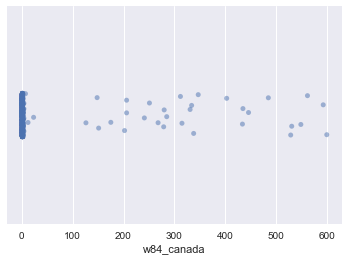

In [7]:
# Your code goes here
# print(trainA["w84_canada"])
sns.stripplot(x=trainA["w84_canada"], jitter = True, alpha =0.5)

### ========== Question 1.8 --- [4 marks] ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

<font color='red'>4/4</font>

In [8]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

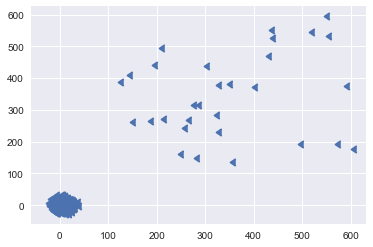

In [9]:
# Your code goes here

scatter_jitter(trainA["w84_canada"], trainA["w50_coverage"])
# sns.clustermap(trainA)

In [10]:
# seed = 7
# np.random.seed(seed)

# # 2
# from keras.models import Sequential
# from keras.layers import Dense
# model = Sequential()
# model.add(Dense(12, input_shape=(11,), init='uniform', activation='sigmoid'))
# model.add(Dense(12, init='uniform', activation='sigmoid'))
# model.add(Dense(12, init='uniform', activation='sigmoid'))
# model.add(Dense(1, init='uniform', activation='sigmoid'))
# model.summary()

# # 3
# import keras
# tbCallBack = keras.callbacks.TensorBoard(log_dir='/tmp/keras_logs', write_graph=True)

# # 4
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# model.fit(dataframeX.values, dataframeY.values, epochs=9, batch_size=50,  verbose=1, validation_split=0.3, callbacks=[tbCallBack])

### ========== Question 1.9 --- [7 marks] ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

<font color='red'>7/7</font>

In [11]:
news_A_clean = trainA.copy()
# Toggle between critical values by uncommenting one of the next three lines.
# According to my study, 95% of the interval gap seems to work well.
# critical_value = 2.576 # 99% critical value. 
critical_value = 1.96  # 95% critical value
# critical_value = 1.645 # 90% critical value
trainA_mean = trainA.mean()
trainA_standard_deviation = trainA.std()
trainA_index = len(trainA.index)
trainA_column = len(trainA.columns)
confidence_interval1 = trainA_mean + critical_value * trainA_standard_deviation # upper bound of the confidence interval for mean
confidence_interval2 = trainA_mean - critical_value * trainA_standard_deviation
columns = pd.Series(trainA.columns)
for record in range(len(columns)):
    news_A_clean = news_A_clean[((news_A_clean[columns[record]] <= confidence_interval1[record]) & (news_A_clean[columns[record]] >= confidence_interval2[record]))]
print (news_A_clean.shape)

(2091, 521)


# zscore outlier try - did not work

In [12]:
# sns.stripplot(x=trainA["w84_canada"], jitter = True, alpha =0.5)
# news_A_clean = trainA.copy()
# # news_A_clean = news_A_clean[news_A_clean < 50]
# for i in range(trainA.columns.shape[0]):
#     news_A_clean = news_A_clean[~(abs(stats.zscore(news_A_clean[trainA.columns[i]])) > 3.29 )]
# news_A_clean[abs(stats.zscore(news_A_clean)) < 3.29]
# news_A_clean.dropna(inplace=True)
# print(news_A_clean.shape)

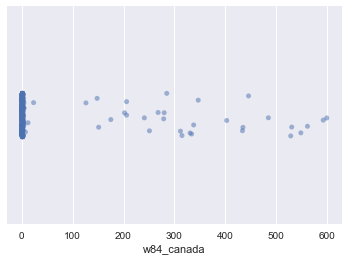

In [13]:
sns.stripplot(x=trainA["w84_canada"], jitter = True, alpha =0.5)

# IQR reduction outlier try:
Has not proven to work well. As the data seems to be reduntant, IQR or zscore could not help.

In [14]:
# Your code goes here
# trainA.columns.shape[0]
# news_A_clean = trainA.copy()
##################### InterQuantile pruning is reducing the datapoints from 2621 to 6 !! So, withdrew! ######################
# As outliers act as influential points that affect the total distribution fo each attribute.
# for i in range(trainA.columns.shape[0]):
#     Q1, Q3, IQR = 0, 0, 0
#     Q1 = trainA[trainA.columns[i]].quantile(0.25)
#     Q3 = trainA[trainA.columns[i]].quantile(0.75)
#     IQR = Q3 - Q1
#     news_A_clean = news_A_clean[~(news_A_clean[trainA.columns[i]] >(Q3+IQR*1.5))]
#     news_A_clean = news_A_clean[~(news_A_clean[trainA.columns[i]] <(Q1-IQR*1.5))]
#     print(IQR)
#     print(news_A_clean.shape)
##################### Different approach #2
# for i in range(trainA.columns.shape[0]):
# #     print(news_A_clean[trainA.columns[i]])
#     q = news_A_clean[news_A_clean.columns[i]].quantile(1)
#     news_A_clean = news_A_clean[news_A_clean[news_A_clean.columns[i]] < q]
#     print(news_A_clean.shape)
# print(news_A_clean.shape)

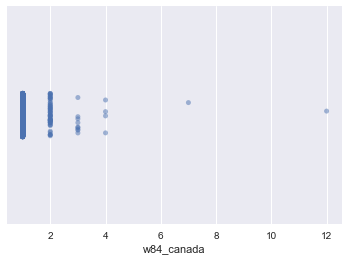

In [15]:
sns.stripplot(x=news_A_clean["w84_canada"], jitter = True, alpha =0.5)

### ========== Question 1.10 --- [3 marks] ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

<font color='red'>1/3</font>

In [16]:
# Your code goes here
news_A_clean.shape

(2091, 521)

## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [4 marks] ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

<font color='red'>3/4 Label axes</font>

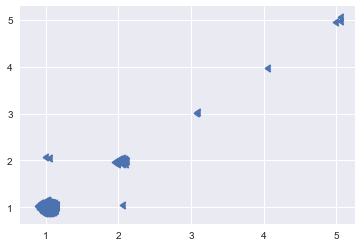

In [17]:
#<font color='red'>1/3</font> Your code goes here
scatter_jitter(news_A_clean['w281_ico'], news_A_clean['w273_tek'])

### ========== Question 2.2 --- [6 marks] ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

<font color='red'>5/6 We have 520 attributes</font>

*Your answer goes here*

It looks like two randomly selected attributes are positively correlated as pairs of them exist. This clashes with the conditional independence assumption of Naive Bayes that makes up the model. If we have nnont made that assumption, then we would have to frame a confusion matrix formatted matrix that holds covariance betweeen the attributes. Considering that we have 521 attributes and we dont have enough of the data poinnts to compute covariance or correlation. Doing so might make the onforth acuracy suffer. So, independence has proven to be better than the other case. We are only assuming conditional independence of the attributrs not just independence.

### ========== Question 2.3 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

<font color='red'>2/5 Display the classification accuracy</font>

In [18]:
# Your code goes here
from sklearn.naive_bayes import GaussianNB
attributes_A = news_A_clean.copy()
class_A = attributes_A['class']
attributes_A = attributes_A.drop("class", axis = 1)
attributes_A.describe()
class_A.describe()
model = GaussianNB()
model.fit(attributes_A, class_A)

GaussianNB(priors=None)

### ========== Question 2.4 --- [5 marks] ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

<font color='red'>5/5</font>

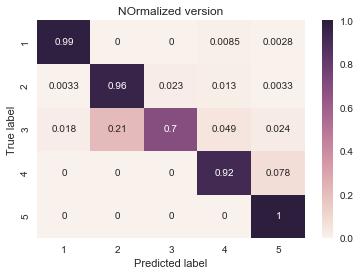

Accuracy is= 0.889048


In [19]:
# Your code goes here
from sklearn.metrics import confusion_matrix
classes=['1','2','3','4','5']
predicted_class = model.predict(attributes_A)
cm = confusion_matrix(predicted_class, class_A)
# If this should not be normalized, comment out the next line to see a raw version.
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
plt.title('NOrmalized version')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
accuracy = model.score(attributes_A, class_A)
print('Accuracy is= %f' % accuracy)

# Commenting out the normalizing statement might yield a confusionn matrix plot with overlow of the predicted value. 
# This proves and realizes the usage of normalization. As it is easy to develop intuitions on the data.

### ========== Question 2.5 --- [3 marks] ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

<font color='red'>1/3</font>

*Your answer goes here*
1. The Confusion matrix fits my expectation as the accuracy speaks for itself. (0.89 approx.) So many true positives along the diagonal.
2. Confusion matrix should have a leading diagonal values comparing with other rows. It has happened so. 
3. Last two rows show us that the attributes are conditionally independent of other especially for class pairs (1,5), (2,5),(3,5),(4,5),(1,4),(2,4),(3,4).
4. From point no:3, we can also see that the model worked fine as it was said in the dataset description that classes (2,3) (ibm, mac) and (4,5) (baseball, hockey) are closely related. Similarly, from the confusion matrix, except the leading(principal) diagonal other highest scores are 0.21 for classes (2, 3) and then 0.078 for classes (4,5). Hence the confusion matrix.


### ========== Question 2.6 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

<font color='red'>5/5</font>

In [20]:
# Your code goes here
attributes_A_with_outliers = trainA.copy()
class_A_with_outliers = attributes_A_with_outliers['class']
attributes_A_with_outliers = attributes_A_with_outliers.drop('class', axis = 1)
model_with_outliers = GaussianNB()
model_with_outliers.fit(attributes_A_with_outliers, class_A_with_outliers)
predicted_class_with_outliers = model_with_outliers.predict(attributes_A_with_outliers)
accuracy_with_outliers = model_with_outliers.score(attributes_A_with_outliers, class_A_with_outliers)
print(accuracy_with_outliers)

0.205260685768


### ========== Question 2.7 --- [4 marks] ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

<font color='red'>4/4</font>

*Your answer goes here*

Being a guassian model, the distribution is getting tampered much and the impact is shown inthe accuracy. Outliers tamper the distribution by increasing the variance of it. Hence the accuracy. Outliers are dangerous for such models. Such models could be generative (like naive Bayes) models. Descriminative models are not sensitive to outiers like this. Descriminative models like logistic regression may be less sensitive to outliers than a Gaussian generative model like ours.

### ========== Question 2.8 --- [5 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

<font color='red'>5/5</font>

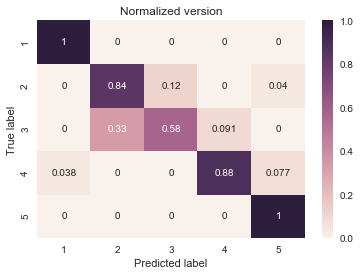

Accuracy is= 0.835938


In [21]:
# Your code goes here
attributes_B = trainB.copy()
class_B = trainB['class']
attributes_B = attributes_B.drop('class', axis =1)
predicted_classes_B = model.predict(attributes_B)
cm_B = confusion_matrix(predicted_classes_B, class_B)
cm_B = cm_B.astype('float') / cm_B.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_B, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
plt.title('Normalized version')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
accuracy_B = model.score(attributes_B, class_B)
print('Accuracy is= %f' % accuracy_B)

### ========== Question 2.9 --- [4 marks] ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

<font color='red'>4/4</font>

*Your answer goes here*

I suppose the accuracy is acceptable as we get an accuracy of 83.5%. It is acceptable as it is an unseen data and also we have not removed outliers. Owing to these caveats, the performance is acceptable. Having analysed the normalised confusion matrix, we can say that class '2' and '3' seem to be confused by the model. Classes '1' and '5' are easy to be not confused by the model.

### ========== Question 2.10 --- [4 marks] ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

<font color='red'>1/4 Multinomial is probably not the simpelest</font>

*Your answer goes here*

After applying few classifiers (implemented below), I find Multinomial NB classifier to be the baseline and Random Forest (SVM, MNB and RF coded below) to be the best of all. Other models tend to have lesser accuracy. Even f(1)-score is higher for Random Forest.

### ========== Question 2.11 --- [4 marks] ==========

Estimate the baseline performance.


<font color='red'>3/4</font>

Here, I have presented with 4 other models that can be used to compare the models with Guassian NB. 
4 other models in the order of appearance.
1. Multinomial Naïve Bayes
2. Support Vector Classification.
3. Ranndom Forest
4. A vanilla multi layer neural network.

In [22]:
# Your code goes here
######### Multinomial NB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
mnb = MultinomialNB()
mnb.fit(attributes_A, class_A)
predicted_class_baseline_mnb = mnb.predict(attributes_B)
score_mnb = accuracy_score(class_B, predicted_class_baseline_mnb)
print(score_mnb)

0.5234375


In [51]:
######### SVC
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(attributes_A, class_A)
predicted_class_baseline_svm = clf.predict(attributes_B)
score_svm = accuracy_score(class_B, predicted_class_baseline_svm)
print(score_svm)

0.6953125


In [24]:
######### Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(attributes_A, class_A)
predicted_class_baseline_rf = rf.predict(attributes_B)
score_rf = accuracy_score(class_B, predicted_class_baseline_rf)
print(score_rf)

0.8671875


In [25]:
########## A vanilla neural network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, 2), random_state=1)
nn.fit(attributes_A, class_A)
predicted_class_baseline_nn = nn.predict(attributes_B)
score_nn = accuracy_score(class_B, predicted_class_baseline_nn)
print(score_nn)

0.765625


### ========== Question 2.12 --- [3 marks] ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

<font color='red'>3/3</font>

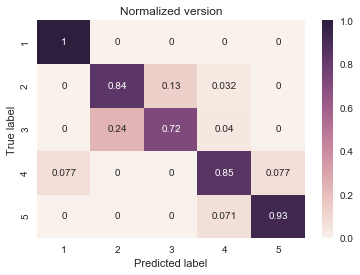

Accuracy is= 0.835938


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50).fit(X=news_A_clean.drop("class", axis=1), y=news_A_clean["class"])
X_ts = trainB.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)
# Your code goes here
cm_B_rf = confusion_matrix(rf_prediction, class_B)
cm_B_rf = cm_B_rf.astype('float') / cm_B_rf.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_B_rf, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
plt.title('Normalized version')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
accuracy_B = model.score(X_ts, class_B)
print('Accuracy is= %f' % accuracy_B)

### ========== Question 2.13 --- [8 marks] ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier. Feel free to use code and plots to illustrate your points.

<font color='red'>6/8</font>

*Your answer goes here*

If asked to choose between RF and NB, I would go with Random forest, the reason is RF can be trusted more if there are more trees (a.k.a n_estimators). 
Being a text classification problem, where words depend on others, we cannot blindly make the conditional independence assumption (in naive bayes classifier). Random Forest doesnt assume so and takes care of the dependency between the attributes. This can be realised by an n-gram language model, where the co-occurrence of words are the main thing. 

Also, Decision trees are readable. 

# Extra Insights:

Returning highest occurring words for each class as given in the corpus.

In [27]:
def returnWordCloudEntries(news):
    count = np.sum(news, axis=0)
    count = count / total_sum # Normalized
    top = count[np.argsort(count)[-10:]] # Top 10 words
    words = top.keys()
    words = [( j.split('_')[1]) for i, j in enumerate(words)] # Dict to list
    return(words)

In [28]:
total_sum = (np.sum(news_A_clean, axis=0))
atheism_news = news_A_clean[news_A_clean['class'] == 1]
ibm_news = news_A_clean[news_A_clean['class'] == 2]
mac_news = news_A_clean[news_A_clean['class'] == 3]
baseball_news = news_A_clean[news_A_clean['class'] == 4]
baseball_news = baseball_news.drop('class', 1)
hockey_news = news_A_clean[news_A_clean['class'] == 5]
hockey_news = hockey_news.drop('class', 1)
# print(baseball_news)
## For Highest word count for a class.
atheism_words = (returnWordCloudEntries(atheism_news))
ibm_words = (returnWordCloudEntries(ibm_news))
mac_words = (returnWordCloudEntries(mac_news))
baseball_words = (returnWordCloudEntries(baseball_news))
hockey_words = (returnWordCloudEntries(hockey_news))
print("Mac class highest occurring words", mac_words)
print("IBM class highest occurring words",ibm_words)
print("Atheism class highest occurring words",atheism_words)
print("Baseball class highest occurring words",baseball_words)
print("Hockey class highest occurring words",hockey_words)


Mac class highest occurring words ['monitor', 'quadra', 'centris', 'se', 'simms', 'use', 'lc', 'problem', 'apple', 'mac']
IBM class highest occurring words ['drives', 'dos', 'controller', 'pc', 'card', 'bus', 'ide', 'mb', 'drive', 'scsi']
Atheism class highest occurring words ['your', 'are', 'it', 'people', 'we', 'not', 'you', 'god', 'of', 'that']
Baseball class highest occurring words ['claim', 'mac', 'runs', 'play', 'mets', 'shots', 'morality', 'season', 'card', 'nhl']
Hockey class highest occurring words ['innocent', 'ports', 'calgary', 'nhl', 'centris', 'apple', 'drive', 'mac', 'game', 'notion']


ROC Curve plot for Naive Bayes classifier.

[ 0.          0.02912621  0.2815534   0.49514563  0.80582524  1.        ]
[ 0.  1.  1.  1.  1.  1.]
[6 5 4 3 2 1]


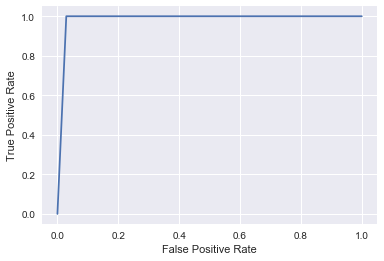

In [50]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
# for i in range(len(classes)):
#     fpr[i], tpr[i], _ = roc_curve(predicted_classes_B[i], class_B[i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
fpr, tpr, thresholds = roc_curve(predicted_classes_B, class_B, pos_label=5)
print(fpr)
print(tpr)
print(thresholds)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [52]:
#### Terribly failed after trying to implement ROC efficiently.
# import scikitplot as skplt
# import matplotlib.pyplot as plt
# skplt.metrics.plot_roc_curve(class_B, predicted_classes_B)
# plt.show()